In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.patches as patches
%matplotlib inline

In [2]:
img = cv2.imread('input_thresholding/hand1.jpg',0)
img.shape

(634, 459)

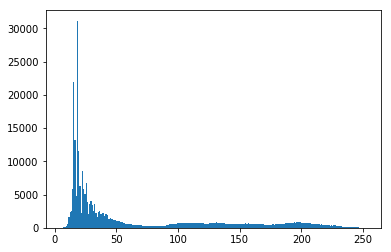

In [3]:
# Histogram
x, y = img.shape
img_hist = img.reshape(x*y)

plt.hist(img_hist, bins=np.arange(img_hist.min(), img_hist.max()+2))
plt.show()

In [4]:
# Segmentation:
# -1 : non labelises
# 0 : background
# 1 : foreground

x, y = img.shape
label = -np.ones((x,y))

T1 = np.percentile(img, 70)
T2 = np.percentile(img, 87)

# T1 = np.percentile(img, 50)
# T2 = np.percentile(img, 87)

for i in range(0,x) :
    for j in range(0,y):
        if img[i][j] < T1 :
            label[i][j] = 0
        if img[i][j] >= T2 :
            label[i][j] = 1

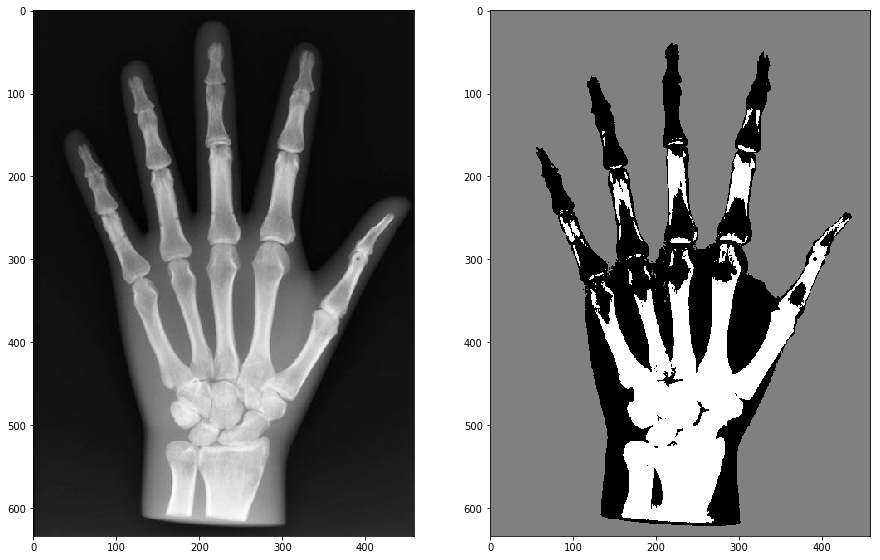

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(label, cmap='gray')

In [6]:
def save_scribble_txt(matrix, name_file, delimiter='\t '):
        str_data = ''
        n, m =np.shape(matrix)
        for i in range(n):
            for j in range(m):
                str_data += str(int(matrix[i,j])) + delimiter
            str_data = str_data[:-len(delimiter)] + '\n'
        
        with open(name_file, "w") as text_file:
            text_file.write(str_data)
        print("Txt file saved")

In [8]:
save_scribble_txt(label, 'output_thresholding/hand1.txt')

Txt file saved
